In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
#to find duplicated rows
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [9]:
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Count'>

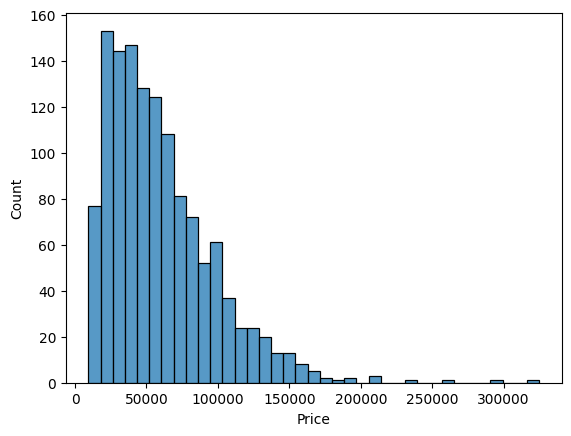

In [12]:
sns.histplot(df['Price'])

<Axes: xlabel='Company'>

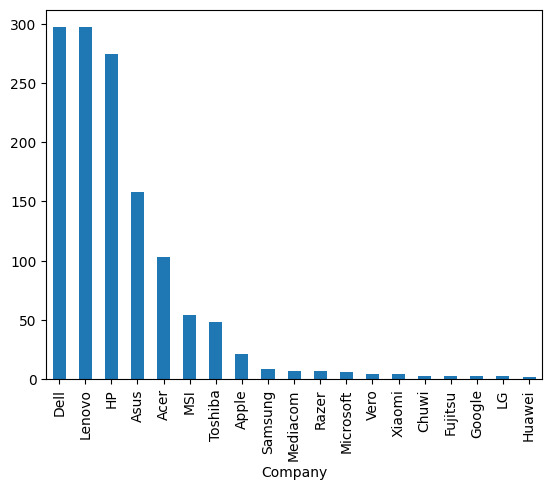

In [13]:
df['Company'].value_counts().plot(kind='bar')

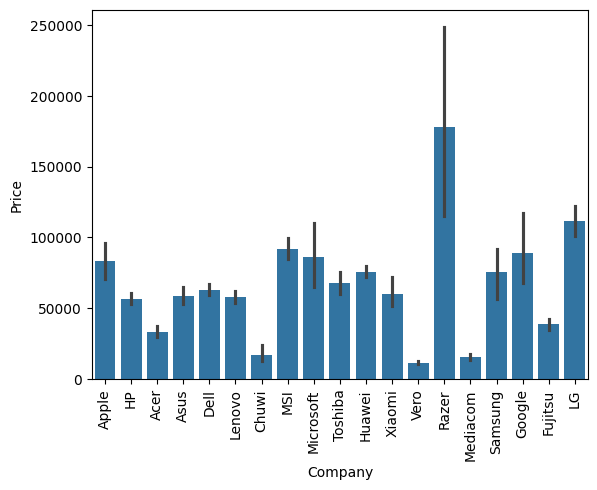

In [14]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

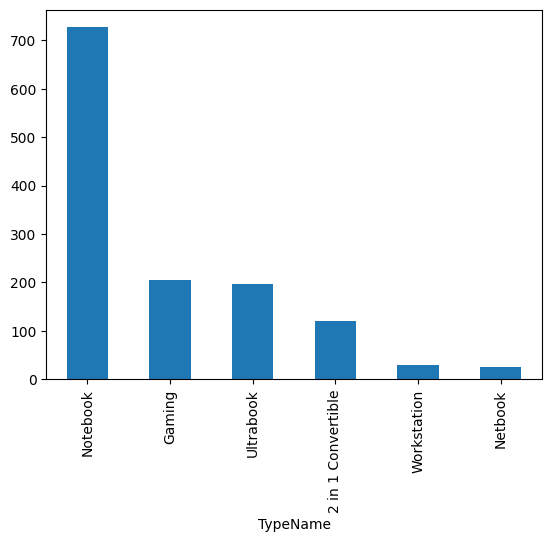

In [15]:
df['TypeName'].value_counts().plot(kind='bar')

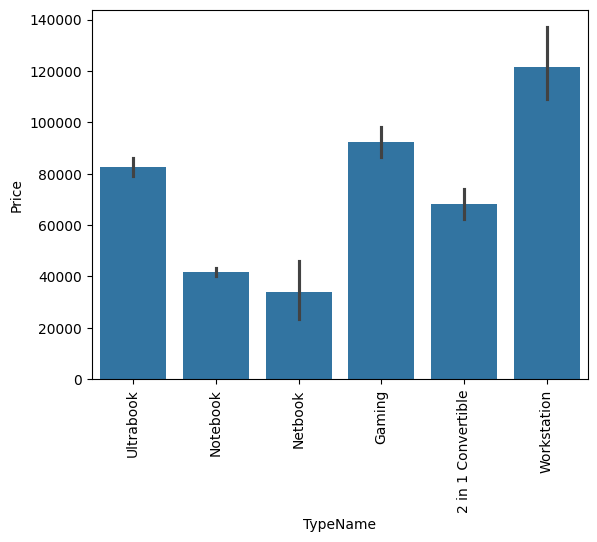

In [16]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [17]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [18]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [19]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [20]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

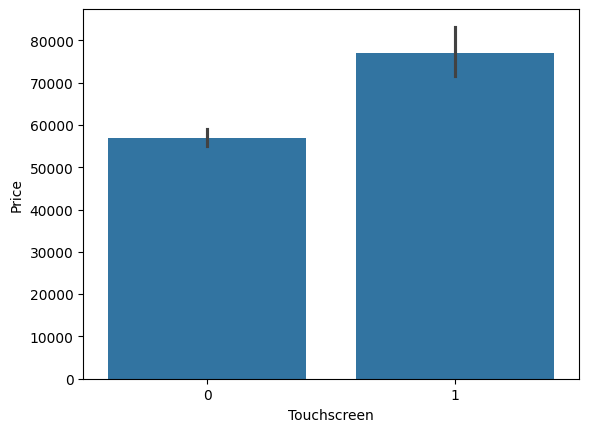

In [21]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

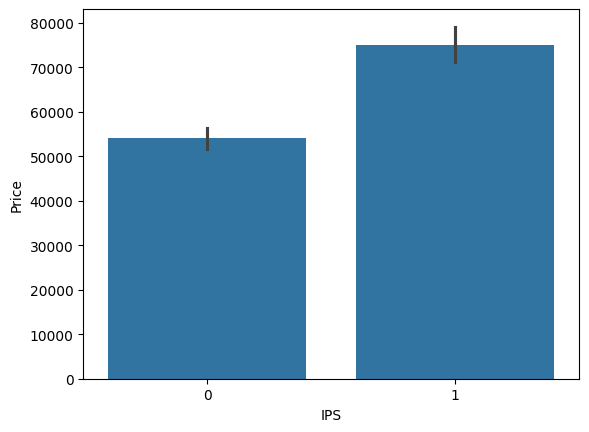

In [22]:
sns.barplot(x=df['IPS'], y=df['Price'])

In [23]:
#IPS Panel Touchscreen 1920x1200 extract the resolution as xres and yres
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [24]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [26]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [27]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int64  
 14  y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [29]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [30]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [31]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)

In [32]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [33]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [34]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [35]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
597,Lenovo,Notebook,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.70,78534.7200,0,1,157.350512,Intel Core i5
312,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.80,111834.7200,0,1,141.211998,Intel Core i7
396,Lenovo,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon RX 550,Windows 10,2.10,65510.9568,0,1,141.211998,Intel Core i7
478,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 520,Windows 10,2.20,35964.0000,0,0,141.211998,Intel Core i5
1059,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.94,96916.3200,0,0,141.211998,Intel Core i7


In [36]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [37]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [38]:
df.drop(columns=['Cpu Name'],inplace=True)

In [39]:
df.drop(columns=['Cpu'],inplace=True)

<Axes: xlabel='Cpu Brand', ylabel='Price'>

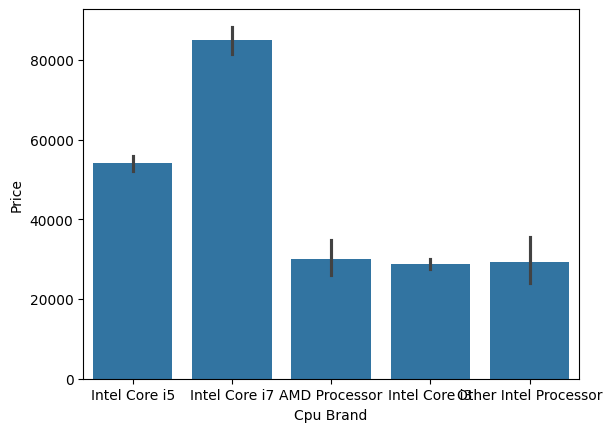

In [40]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])

<Axes: xlabel='Ram', ylabel='Price'>

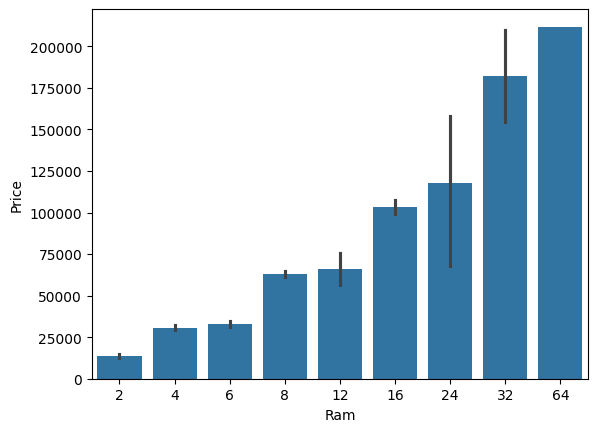

In [41]:
sns.barplot(x=df['Ram'], y=df['Price'])

In [42]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [43]:
import re

# Make sure all entries are strings
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace(' ', '')  # remove any accidental spaces

# Split memory into two parts (in case of combinations like 128GBSSD+1TBHDD)
new = df['Memory'].str.split('\+', n=1, expand=True)
df['first'] = new[0]
df['second'] = new[1].fillna('0')

# Function to extract size and convert TB to GB
def extract_size_in_gb(s):
    match = re.search(r'(\d+\.?\d*)(TB|GB)', s.upper())
    if match:
        size = float(match.group(1))
        unit = match.group(2)
        return int(size * 1000 if unit == 'TB' else size)
    return 0

# Function to extract storage type flags
def get_storage_flags(s):
    s = s.upper()
    return pd.Series({
        'HDD': int('HDD' in s),
        'SSD': int('SSD' in s),
        'Hybrid': int('HYBRID' in s),
        'Flash_Storage': int('FLASH' in s and 'STORAGE' in s)
    })

# Apply to first and second storage
df['first_size'] = df['first'].apply(extract_size_in_gb)
df['second_size'] = df['second'].apply(extract_size_in_gb)

df = pd.concat([
    df,
    df['first'].apply(get_storage_flags).add_prefix('Layer1_'),
    df['second'].apply(get_storage_flags).add_prefix('Layer2_')
], axis=1)

# Final computed storage columns in GB
df['HDD'] = df['first_size'] * df['Layer1_HDD'] + df['second_size'] * df['Layer2_HDD']
df['SSD'] = df['first_size'] * df['Layer1_SSD'] + df['second_size'] * df['Layer2_SSD']
df['Hybrid'] = df['first_size'] * df['Layer1_Hybrid'] + df['second_size'] * df['Layer2_Hybrid']
df['Flash_Storage'] = df['first_size'] * df['Layer1_Flash_Storage'] + df['second_size'] * df['Layer2_Flash_Storage']

# Drop intermediate columns
df.drop(columns=[
    'first', 'second', 'first_size', 'second_size',
    'Layer1_HDD', 'Layer1_SSD', 'Layer1_Hybrid', 'Layer1_Flash_Storage',
    'Layer2_HDD', 'Layer2_SSD', 'Layer2_Hybrid', 'Layer2_Flash_Storage'
], inplace=True)

<>:8: SyntaxWarning: invalid escape sequence '\+'
<>:8: SyntaxWarning: invalid escape sequence '\+'
C:\Users\HP\AppData\Local\Temp\ipykernel_29308\3945416378.py:8: SyntaxWarning: invalid escape sequence '\+'
  new = df['Memory'].str.split('\+', n=1, expand=True)


In [44]:
# df.drop(columns=[
#     'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
#     'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
# ], inplace=True)

In [45]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
410,Lenovo,Workstation,8,512GBSSD,Nvidia Quadro M1200,Windows 10,2.67,102564.00,0,0,141.211998,Intel Core i7,0,512,0,0
101,HP,Notebook,4,500GBHDD,AMD Radeon R2,Windows 10,2.10,18594.72,0,0,141.211998,AMD Processor,500,0,0,0
1170,HP,Notebook,8,256GBSSD,Intel HD Graphics 520,Windows 10,1.96,36177.12,0,0,141.211998,Intel Core i7,0,256,0,0
889,Lenovo,Notebook,4,500GBHDD,AMD Radeon R3,Windows 10,2.80,20193.12,0,0,106.113062,AMD Processor,500,0,0,0
1084,Dell,Notebook,8,256GBSSD,Intel HD Graphics 620,Windows 10,2.18,39960.00,0,0,141.211998,Intel Core i5,0,256,0,0


In [46]:
df.drop(columns=['Memory'],inplace=True)

In [47]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [48]:
df.drop(columns=['Hybrid', 'Flash_Storage'],inplace=True)

In [49]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [50]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [51]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [52]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [53]:
df = df[df['Gpu brand'] != 'ARM']

In [54]:
df.drop(columns=['Gpu'],inplace=True)

In [55]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [56]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [57]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'MAC OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [58]:
df['os'] = df['OpSys'].apply(cat_os)

In [59]:
df.drop(columns=['OpSys'],inplace=True)

<Axes: xlabel='Weight', ylabel='Count'>

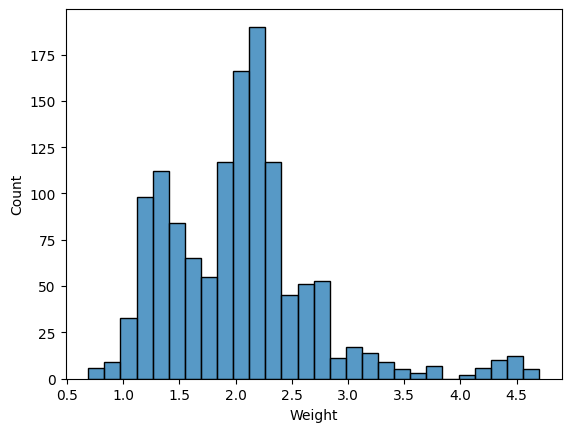

In [60]:
sns.histplot(df['Weight'])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   ppi          1302 non-null   float64
 8   Cpu Brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


<Axes: >

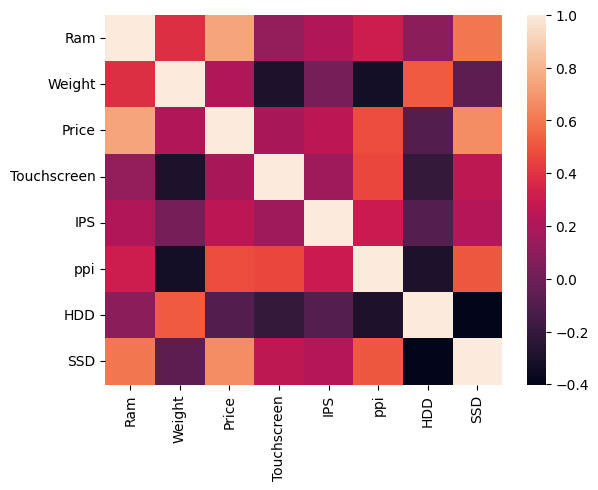

In [62]:
sns.heatmap(df.corr(numeric_only=True))

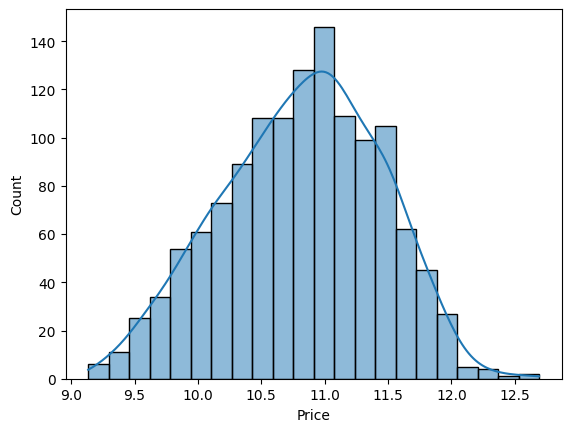

In [63]:
sns.histplot(np.log(df['Price']), kde=True)
plt.show()

In [64]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [65]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=2)

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [70]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [69]:
# !pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2 score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2 score 0.8074747226284237
mae 0.20953298603048934


### Ridge Regresion

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8130100480216882
MAE 0.20947753213120168


### Lasso Regression

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2 score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2 score 0.8070671713886916
mae 0.21137357474501894


### KNN

In [84]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2 score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2 score 0.803148868705085
mae 0.19264883332948868


### Decision Tree

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2 score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2 score 0.8251964795119627
mae 0.18977411912508302


### Random Forest

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2 score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2 score 0.8863023149967928
mae 0.15923526318538234


### XgBoost

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('r2 score', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

r2 score 0.8830976954279096
mae 0.161621798101751


### Voting Regressor

In [89]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8904476165170807
MAE 0.15786676309770284


### Stacking

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8829516660848413
MAE 0.16329327202211158


In [93]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [94]:
x_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux
